In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

PG_USER = 'mushroom-writer'
PG_PASSWORD = '481224v!'
PG_HOST = 'skoeb.ddns.net'
PG_PORT = '5432'
PG_DB = 'mushroom'
PG_URI = f"postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DB}"

In [2]:
# --- Download Table ---
engine = create_engine(PG_URI)

query = """SELECT * FROM dummy.sensor_readings"""
df = pd.read_sql(query, engine)

df.set_index(pd.DatetimeIndex(df['timestamp']), inplace=True)
df.drop('timestamp', axis='columns', inplace=True)

df.tail()

,temperature,humidity,moisture_reading,moisture_pct
timestamp,,,,
2021-02-19 13:52:16.989622,20.0,95.0,-100.0,-100.0
2021-02-19 13:53:17.612585,19.0,95.0,-100.0,-100.0
2021-02-19 13:54:18.236397,19.0,92.0,-100.0,-100.0
2021-02-19 13:55:18.581074,20.0,85.0,-100.0,-100.0
2021-02-19 13:56:19.135699,20.0,81.0,-100.0,-100.0


In [3]:
# --- Clean up ---
df = df.resample('5T').mean()
df = df['2021-02-17 05:20:00':]
df = df.rolling(5).mean()
df = df.dropna(subset=['temperature','moisture_reading'])


In [4]:
df

,temperature,humidity,moisture_reading,moisture_pct
timestamp,,,,
2021-02-19 05:05:00,21.386667,55.906667,-100.0,-100.0
2021-02-19 05:10:00,22.760000,68.200000,-100.0,-100.0
2021-02-19 05:15:00,22.560000,78.040000,-100.0,-100.0
2021-02-19 05:20:00,22.360000,86.360000,-100.0,-100.0
2021-02-19 05:25:00,22.160000,89.760000,-100.0,-100.0
...,...,...,...,...
2021-02-19 13:35:00,20.000000,95.000000,-100.0,-100.0
2021-02-19 13:40:00,20.000000,95.000000,-100.0,-100.0
2021-02-19 13:45:00,20.000000,95.000000,-100.0,-100.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

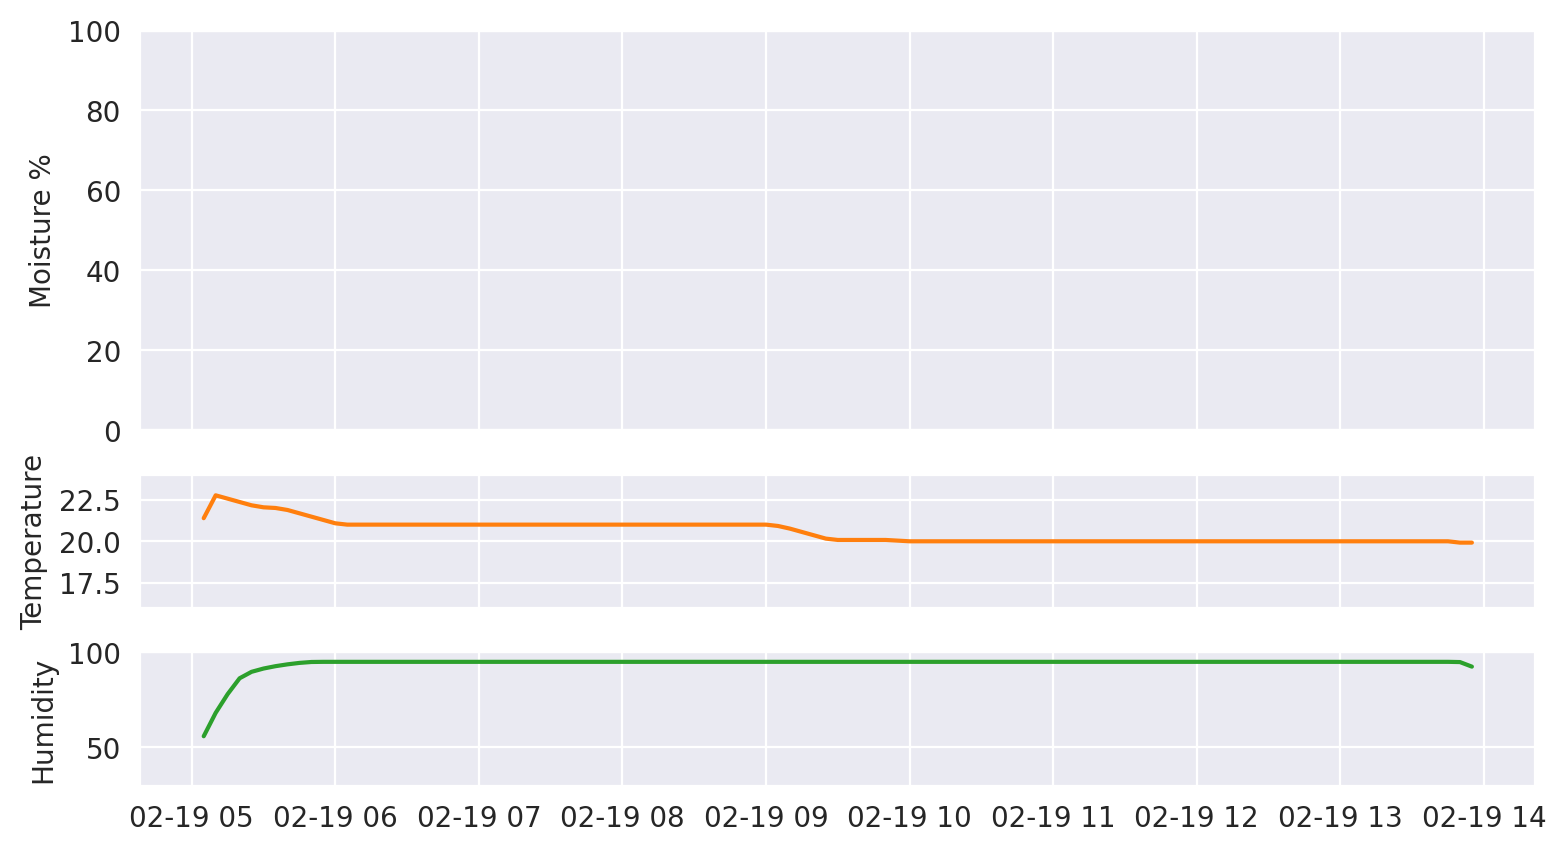

In [5]:
cp = sns.color_palette()
sns.set_style('darkgrid')

fig = plt.figure(figsize=(9,5), dpi=200)
gs = gridspec.GridSpec(3,1, height_ratios=[3,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.plot(df.index, df['moisture_pct'],
           color=cp[0])
ax2.plot(df.index, df['temperature'],
           color=cp[1])
ax3.plot(df.index, df['humidity'],
           color=cp[2])

ax1.set_ylabel('Moisture %')
ax2.set_ylabel('Temperature')
ax3.set_ylabel('Humidity')

ax1.set_ylim(0,100)
ax2.set_ylim(16,24)
ax3.set_ylim(30,100)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)